In [2]:
from __future__ import absolute_import, division, print_function
%matplotlib inline

import tensorflow as tf

from tensorflow_examples.models.pix2pix import pix2pix

import os
import time
import matplotlib.pyplot as plt
from IPython.display import clear_output
from pathlib import Path



AUTOTUNE = tf.data.AUTOTUNE


In [34]:
batch_size = 1
img_height = 256
img_width = 256
monet_dir = Path("dataset_monet")
photo_dir = Path("dataset_photo")


In [ ]:
monet_dataset = Dataset(monet_dir)
data_loader = DataLoader(monet_dataset, BATCH_SIZE, shuffle=True, num_workers=N_WORKERS)

In [35]:
train_monet = tf.keras.utils.image_dataset_from_directory(
  monet_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
  
test_monet = tf.keras.utils.image_dataset_from_directory(
  monet_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 300 files belonging to 1 classes.
Using 240 files for training.
Found 300 files belonging to 1 classes.
Using 60 files for validation.


In [18]:
# monet_dir = "dataset_monet\monet_jpg"
# photo_dir = "dataset_photo\photo_jpg"

# all_photo = tf.data.Dataset.list_files(photo_dir + '\\*jpg')
# all_monet = tf.data.Dataset.list_files(monet_dir + '\\*jpg')

# # def load(filepath):
# #     image = tf.io.read_file(filepath)
# #     image = tf.image.decode_image(image)
# #     return image

# # ds = files.map(load)

In [19]:
# train_photo = all_photo.take(5631) 
# test_photo = all_photo.skip(1407)

In [20]:
# train_monet = all_monet.take(240) 
# test_monet = all_monet.skip(60)

In [36]:
train_photo = tf.keras.utils.image_dataset_from_directory(
  photo_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
  
test_photo = tf.keras.utils.image_dataset_from_directory(
  photo_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 7038 files belonging to 1 classes.
Using 5631 files for training.
Found 7038 files belonging to 1 classes.
Using 1407 files for validation.


In [43]:
print(train_photo)
print(train_monet)
print(test_photo)
print(test_monet)

<BatchDataset shapes: ((None, 256, 256, 3), (None,)), types: (tf.float32, tf.int32)>
<BatchDataset shapes: ((None, 256, 256, 3), (None,)), types: (tf.float32, tf.int32)>
<BatchDataset shapes: ((None, 256, 256, 3), (None,)), types: (tf.float32, tf.int32)>
<BatchDataset shapes: ((None, 256, 256, 3), (None,)), types: (tf.float32, tf.int32)>


In [22]:
# BUFFER_SIZE = 1000
# def random_crop(image):
#   cropped_image = tf.image.random_crop(
#       image, size=[img_height, img_width, 3])

#   return cropped_image

In [23]:
# # normalizing the images to [-1, 1]
# def normalize(image):
#   image = tf.cast(image, tf.float32)
#   image = (image / 127.5) - 1
#   return image

In [26]:
# def random_jitter(image):
#   # resizing to 286 x 286 x 3
#   image = tf.image.resize(image, [286, 286],
#                           method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)

#   # randomly cropping to 256 x 256 x 3
#   image = random_crop(image)

#   # random mirroring
#   image = tf.image.random_flip_left_right(image)

#   return image

In [30]:
# def preprocess_image_train(image):
#   image = random_jitter(image)
#   image = normalize(image)
#   return image

In [31]:
# def preprocess_image_test(image):
#   image = normalize(image)
#   return image

In [32]:
# train_monet = train_monet.cache().map(
#     preprocess_image_train, num_parallel_calls=AUTOTUNE).shuffle(
#     BUFFER_SIZE).batch(batch_size)

# train_photo = train_photo.cache().map(
#     preprocess_image_train, num_parallel_calls=AUTOTUNE).shuffle(
#     BUFFER_SIZE).batch(batch_size)

# test_monet = test_monet.map(
#     preprocess_image_test, num_parallel_calls=AUTOTUNE).cache().shuffle(
#     BUFFER_SIZE).batch(batch_size)

# test_photo = test_photo.map(
#     preprocess_image_test, num_parallel_calls=AUTOTUNE).cache().shuffle(
#     BUFFER_SIZE).batch(batch_size)

ValueError: in user code:

    File "C:\Users\CEPC~1\AppData\Local\Temp/ipykernel_10384/2038447156.py", line 2, in preprocess_image_train  *
        image = random_jitter(image)
    File "C:\Users\CEPC~1\AppData\Local\Temp/ipykernel_10384/2097116048.py", line 3, in random_jitter  *
        image = tf.image.resize(image, [286, 286],

    ValueError: 'images' must have either 3 or 4 dimensions.


In [40]:
sample_monet = next(iter(train_monet))
sample_photo = next(iter(train_photo))

In [41]:
OUTPUT_CHANNELS = 3

generator_g = pix2pix.unet_generator(OUTPUT_CHANNELS, norm_type='instancenorm')
generator_f = pix2pix.unet_generator(OUTPUT_CHANNELS, norm_type='instancenorm')

discriminator_x = pix2pix.discriminator(norm_type='instancenorm', target=False)
discriminator_y = pix2pix.discriminator(norm_type='instancenorm', target=False)

In [42]:
to_monet = generator_g(sample_photo)
to_photo = generator_f(sample_monet)
plt.figure(figsize=(8, 8))
contrast = 8

imgs = [sample_photo, to_monet, sample_monet, to_photo]
title = ['photo', 'To monet', 'monet', 'To photo']

for i in range(len(imgs)):
  plt.subplot(2, 2, i+1)
  plt.title(title[i])
  if i % 2 == 0:
    plt.imshow(imgs[i][0] * 0.5 + 0.5)
  else:
    plt.imshow(imgs[i][0] * 0.5 * contrast + 0.5)
plt.show()

ValueError: Layer "model_4" expects 1 input(s), but it received 2 input tensors. Inputs received: [<tf.Tensor: shape=(1, 256, 256, 3), dtype=float32, numpy=
array([[[[ 87., 142., 199.],
         [ 87., 142., 199.],
         [ 87., 142., 199.],
         ...,
         [ 88., 144., 201.],
         [ 89., 145., 202.],
         [ 90., 146., 203.]],

        [[ 89., 144., 201.],
         [ 89., 144., 201.],
         [ 89., 144., 201.],
         ...,
         [ 89., 145., 202.],
         [ 89., 145., 202.],
         [ 90., 146., 203.]],

        [[ 91., 146., 202.],
         [ 91., 146., 202.],
         [ 91., 146., 202.],
         ...,
         [ 89., 145., 202.],
         [ 89., 145., 202.],
         [ 90., 146., 203.]],

        ...,

        [[ 50.,  54.,  57.],
         [ 62.,  66.,  69.],
         [ 34.,  38.,  39.],
         ...,
         [172., 174., 169.],
         [150., 156., 152.],
         [198., 207., 202.]],

        [[ 46.,  49.,  54.],
         [ 66.,  70.,  73.],
         [ 74.,  78.,  79.],
         ...,
         [152., 154., 143.],
         [152., 162., 154.],
         [145., 160., 155.]],

        [[ 29.,  32.,  37.],
         [ 33.,  37.,  40.],
         [ 54.,  58.,  61.],
         ...,
         [161., 163., 150.],
         [154., 165., 157.],
         [151., 168., 162.]]]], dtype=float32)>, <tf.Tensor: shape=(1,), dtype=int32, numpy=array([0])>]

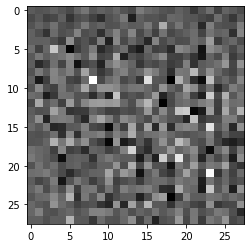

In [13]:
generator = make_generator_model()

noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False)

plt.imshow(generated_image[0, :, :, 0], cmap='gray')

In [22]:
def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(Conv2D(64, (5, 5), strides=(2, 2), padding='same',
                                     input_shape=[28, 28, 1]))
    model.add(LeakyReLU())
    model.add(Dropout(0.3))

    model.add(Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(LeakyReLU())
    model.add(Dropout(0.3))

    model.add(Flatten())
    model.add(Dense(1))

    return model

In [23]:
discriminator = make_discriminator_model()
decision = discriminator(generated_image)
print (decision)

tf.Tensor([[-0.00185516]], shape=(1, 1), dtype=float32)


In [25]:
# This method returns a helper function to compute cross entropy loss
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [26]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

In [27]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

In [28]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

In [29]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

In [30]:
EPOCHS = 50
noise_dim = 100
num_examples_to_generate = 16

# You will reuse this seed overtime (so it's easier)
# to visualize progress in the animated GIF)
seed = tf.random.normal([num_examples_to_generate, noise_dim])

In [31]:
# Notice the use of `tf.function`
# This annotation causes the function to be "compiled".
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_images = generator(noise, training=True)

      real_output = discriminator(images, training=True)
      fake_output = discriminator(generated_images, training=True)

      gen_loss = generator_loss(fake_output)
      disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

In [35]:
def generate_and_save_images(model, epoch, test_input):
  # Notice `training` is set to False.
  # This is so all layers run in inference mode (batchnorm).
  predictions = model(test_input, training=False)

  fig = plt.figure(figsize=(4, 4))

  for i in range(predictions.shape[0]):
      plt.subplot(4, 4, i+1)
      plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
      plt.axis('off')

  plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()

In [36]:
def train(dataset, epochs):
  for epoch in range(epochs):
    start = time.time()

    for image_batch in dataset:
      train_step(image_batch)

    # Produce images for the GIF as you go
    display.clear_output(wait=True)
    generate_and_save_images(generator,
                             epoch + 1,
                             seed)

    # Save the model every 15 epochs
    if (epoch + 1) % 15 == 0:
      checkpoint.save(file_prefix = checkpoint_prefix)

    print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))

  # Generate after the final epoch
  display.clear_output(wait=True)
  generate_and_save_images(generator,
                           epochs,
                           seed)